In [5]:
import pandas as pd
from scipy.stats import chi2_contingency
import re
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
data = pd.read_csv('data_res.csv', index_col = 0)

In [4]:
data = data.dropna(subset='업종분류')

In [5]:
data['수요'] = data['업종분류'].apply(lambda x: 1 if data['업종분류'].value_counts()[x] > 3 else 0)
data.isna().sum()

기업명                0
업종분류               0
사원수              922
설립연도               0
기업형태             815
매출액              165
주소                 8
직무                 0
자격요건              19
직급                 0
이용하는기술스택/우대사항      7
해당 페이지 URL         0
기업 홈페이지 URL       33
수요                 0
dtype: int64

<Axes: xlabel='수요', ylabel='count'>

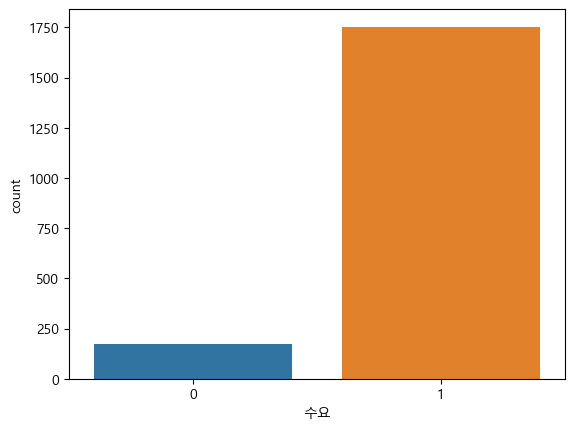

In [5]:
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
sns.countplot(x = data['수요'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1927 entries, 0 to 1964
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   기업명            1927 non-null   object 
 1   업종분류           1927 non-null   object 
 2   사원수            1005 non-null   float64
 3   설립연도           1927 non-null   float64
 4   기업형태           1112 non-null   object 
 5   매출액            1762 non-null   float64
 6   주소             1919 non-null   object 
 7   직무             1927 non-null   object 
 8   자격요건           1908 non-null   object 
 9   직급             1927 non-null   int64  
 10  이용하는기술스택/우대사항  1920 non-null   object 
 11  해당 페이지 URL     1927 non-null   object 
 12  기업 홈페이지 URL    1894 non-null   object 
 13  수요             1927 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 225.8+ KB


In [46]:
# contingency_table = pd.crosstab(data['수요'], data[ 이 부분 수정하시면 됩니다.])

contingency_table = pd.crosstab(data['수요'], data['기업형태'])
display(contingency_table)
chi2 , p_value , _, _= chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
alpha = 0.05

if p_value < alpha:
    print("귀무가설 기각. \n통계적으로 유의미한 연관성이 있다.")
else:
    print("귀무가설 기각할 수 없음. \n통계적으로 유의미한 연관성이 없다.")

기업형태,대기업,소기업,중견기업,중소기업
수요,,,,
0,7,0,18,76
1,45,53,116,797


Chi-square statistic: 9.723235456664304
P-value: 0.021071345594098175
귀무가설 기각. 
통계적으로 유의미한 연관성이 있다.


# 업종 분류별 수요가 높은 그룹의 특징

* 주소                  
>Chi-square statistic: 329.83904893681165                  
>P-value: 5.056018572498105e-36                    
>귀무가설 기각.                                      
>통계적으로 유의미한 연관성이 있다.

* 직급              
>Chi-square statistic: 19.762825656511534              
>P-value: 0.03157746933515181                      
>귀무가설 기각.                              
>통계적으로 유의미한 연관성이 있다.

* 사원수
>Chi-square statistic: 417.8765682421834                      
>P-value: 3.088469063842907e-33                            
>귀무가설 기각.                                  
>통계적으로 유의미한 연관성이 있다.

* 직무 
>Chi-square statistic: 251.45571518200796            
>P-value: 1.006600476331991e-21            
>귀무가설 기각.            
>통계적으로 유의미한 연관성이 있다.

* 기업형태
>Chi-square statistic: 9.723235456664304               
>P-value: 0.021071345594098175           
>귀무가설 기각.                  
>통계적으로 유의미한 연관성이 있다.

In [12]:
sns.set_theme(style="darkgrid")

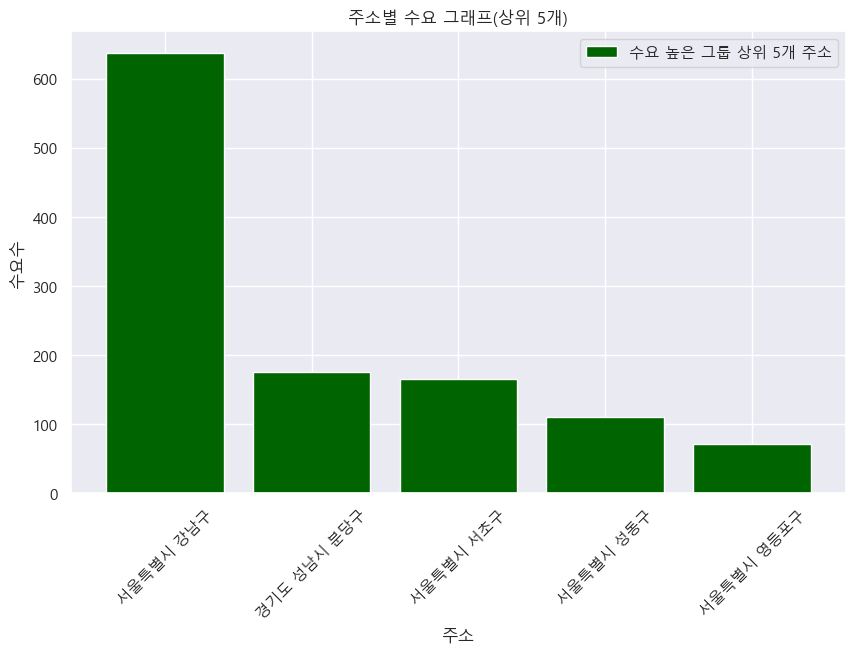

In [14]:
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
df = pd.DataFrame(data)

# 주소별 기업 개수 계산
address_count = df.loc[df['수요'] == 1, '주소'].value_counts().sort_values(ascending=False)
address_count_1 = df.loc[df['수요'] == 0, '주소'].value_counts().sort_values(ascending=False)

# 상위 5개 주소
top_5_address = address_count.head(5)

# 하위 5개 주소
bottom_5_address = address_count_1.head(4)

# 시각화
plt.figure(figsize=(10, 6))

# 상위 5개 주소 막대 그래프
plt.bar(top_5_address.index, top_5_address.values, color='darkgreen', label='수요 높은 그룹 상위 5개 주소')

plt.xlabel('주소')
plt.ylabel('수요수')
plt.title('주소별 수요 그래프(상위 5개)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

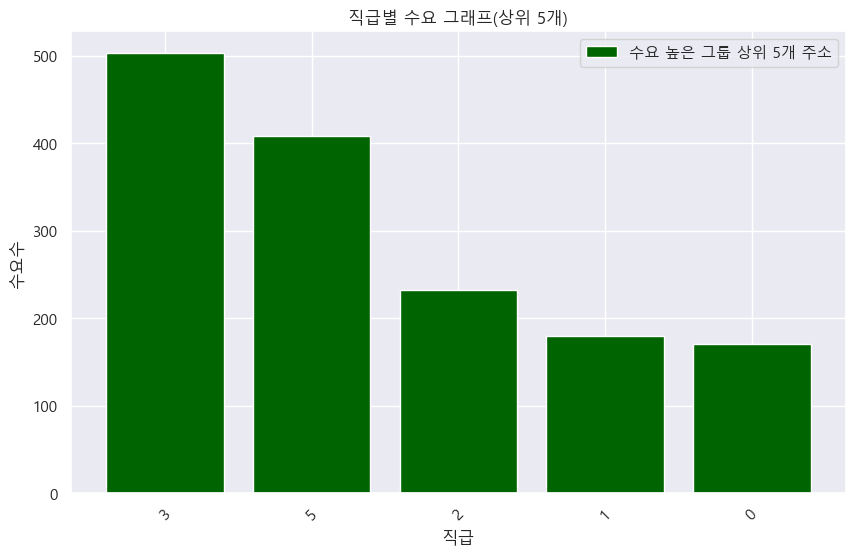

In [16]:
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
df = pd.DataFrame(data)

# 주소별 기업 개수 계산
car_count = df.loc[df['수요'] == 1, '직급'].value_counts().sort_values(ascending=False)
# 상위 5개 주소
top_5_car = car_count.head(5)


# 시각화
plt.figure(figsize=(10, 6))

# 상위 5개 주소 막대 그래프
plt.bar(top_5_car.index.astype(str), top_5_car.values, color='darkgreen', label='수요 높은 그룹 상위 5개 주소')

plt.xlabel('직급')
plt.ylabel('수요수')
plt.title('직급별 수요 그래프(상위 5개)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11036\363847491.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop.사원수 = df_drop['사원수'].astype(int)


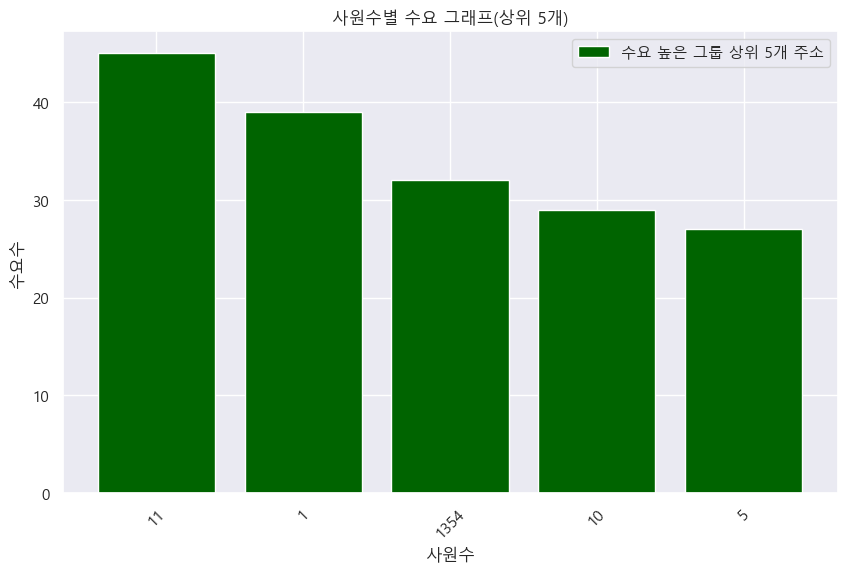

In [44]:
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
df = pd.DataFrame(data)

df_drop = df.dropna(subset = '사원수')
df_drop.사원수 = df_drop['사원수'].astype(int)

# 주소별 기업 개수 계산
emp_count = df_drop.loc[df_drop['수요'] == 1, '사원수'].value_counts().sort_values(ascending=False)
# 상위 5개 주소
top_5_emp = emp_count.head(5)



# 시각화
plt.figure(figsize=(10, 6))

# 상위 5개 주소 막대 그래프
plt.bar(top_5_emp.index.astype(str), top_5_emp.values, color='darkgreen', label='수요 높은 그룹 상위 5개 주소')

plt.xlabel('사원수')
plt.ylabel('수요수')
plt.title('사원수별 수요 그래프(상위 5개)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

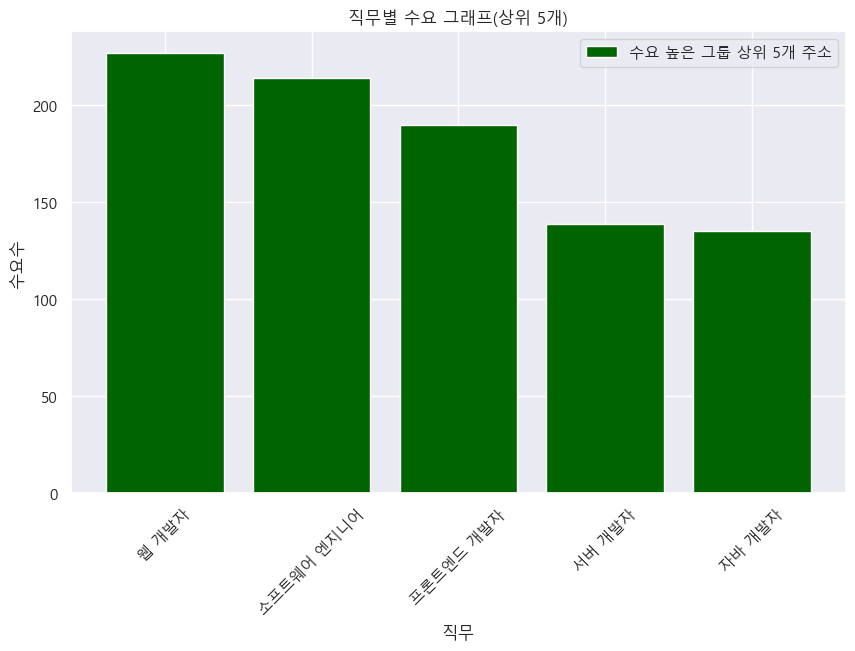

In [43]:
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
df = pd.DataFrame(data)

# 주소별 기업 개수 계산
job_count = df.loc[df['수요'] == 1, '직무'].value_counts().sort_values(ascending=False)
# 상위 5개 주소
top_5_job = job_count.head(5)



# 시각화
plt.figure(figsize=(10, 6))

# 상위 5개 주소 막대 그래프
plt.bar(top_5_job.index, top_5_job.values, color='darkgreen', label='수요 높은 그룹 상위 5개 주소')

plt.xlabel('직무')
plt.ylabel('수요수')
plt.title('직무별 수요 그래프(상위 5개)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

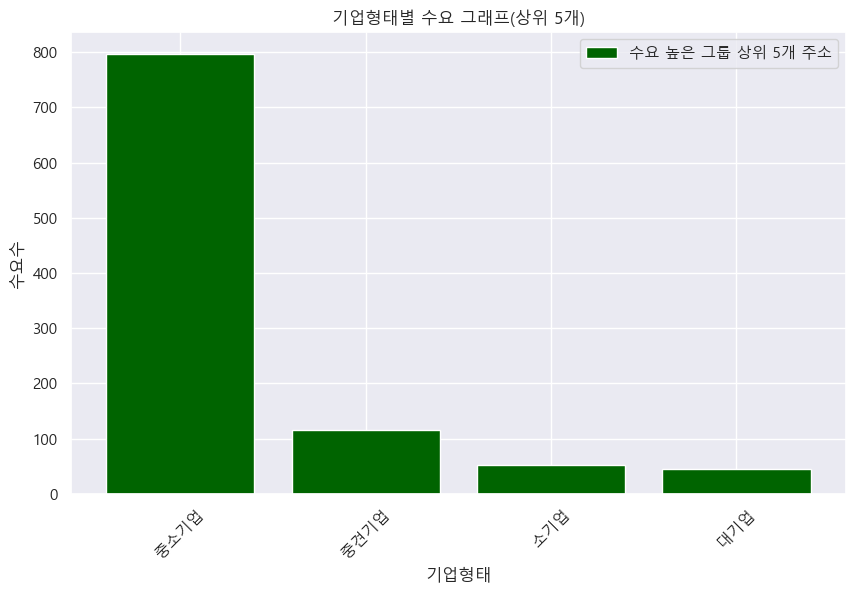

In [47]:
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
df = pd.DataFrame(data)

# 주소별 기업 개수 계산
corp_count = df.loc[df['수요'] == 1, '기업형태'].value_counts().sort_values(ascending=False)
# 상위 5개 주소
top_5_corp = corp_count.head(5)



# 시각화
plt.figure(figsize=(10, 6))

# 상위 5개 주소 막대 그래프
plt.bar(top_5_corp.index, top_5_corp.values, color='darkgreen', label='수요 높은 그룹 상위 5개 주소')

plt.xlabel('기업형태')
plt.ylabel('수요수')
plt.title('기업형태별 수요 그래프(상위 5개)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [7]:
data = data.dropna(subset= '이용하는기술스택/우대사항')

In [8]:
tec_list = []

for qqq in data['이용하는기술스택/우대사항']:
    tec_list.append(qqq)

In [10]:
tec_words = ''.join(tec_list).split(',')

In [23]:
sum(1 for aa in tec_words if 'k8s' in aa)

0

In [15]:
len(tec_words)

28167